In [11]:
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [12]:
def mp(niter, step_size, initial=0):
    seed_num = int(dt.strftime(dt.now(), '%H%f'))
    np.random.seed(seed_num)
    
    # initial 
    x = initial
    naccept = 0
    
    # resp obj
    resp = np.zeros(niter)
    resp[0] = initial
    
    # sampling
    for i in range(1, niter):
        backup_x = x
        action_init = 0.5 * x * x
        
        dx = np.random.rand()
        dx = (dx - 0.5) * step_size * 2
        x = x + dx
        
        action_fin = 0.5*x*x
        
        metropolis = np.random.rand()
        if np.exp(action_init - action_fin) > metropolis:
            naccept += 1
        else:
            x = backup_x
        resp[i] = x
    return resp

In [13]:
k100 = mp(100, 0.5)

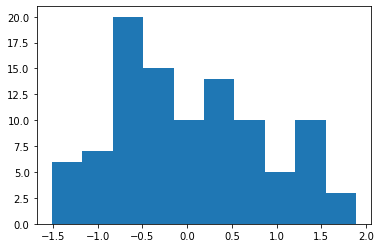

In [15]:
plt.hist(k100)
plt.show()

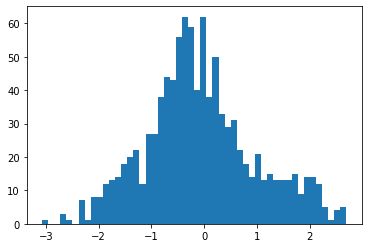

In [18]:
plt.hist(mp(1000, 0.5), bins=50)
plt.show()

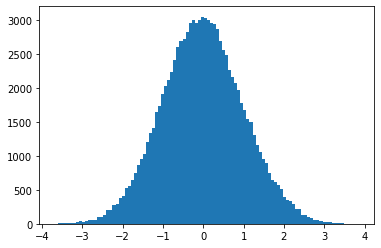

CPU times: user 542 ms, sys: 19.5 ms, total: 562 ms
Wall time: 568 ms


In [26]:
%%time
plt.hist(mp(10**5, 0.5), bins=100)
plt.show()

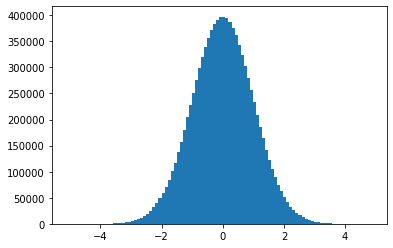

CPU times: user 19.3 s, sys: 40.1 ms, total: 19.4 s
Wall time: 19.4 s


In [27]:
%%time
plt.hist(mp(10**7, 0.5), bins=100)
plt.show()

In [37]:
means = []
sds = []
counter = 0
initial = 0.3
iter_k = 50

for i in np.linspace(1, 10**7, iter_k):
    counter += 1
    s = mp(int(i), 0.5, 0.3)
    means.append(np.mean(s))
    sds.append(np.std(s))
    if counter % 10 == 0:
        print(counter, ' / ', iter_k)

10  /  50
20  /  50
30  /  50
40  /  50
50  /  50


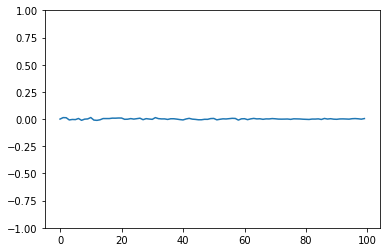

In [34]:
plt.plot(means)
plt.ylim(-1, 1)
plt.show()

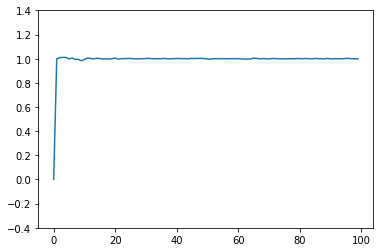

In [35]:
plt.plot(sds)
plt.ylim(-0.4, 1.4)
plt.show()